# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

# Checking information about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Observations
- Most of the columns are of object type
- Education & Education_num column tells exectly same information about the data so we can drop one of them in future.
- There are total 15 columns and 32560 rows 
- Looks like there are no missing values present in any of the columns.

# Checking for null values

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values in data

# Checking for duplicated values

In [7]:
df.duplicated().sum()

24

In [8]:
df[df.duplicated()].head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


- There are 24 duplicate rows present in data hence we have to remove those columns

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(32536, 15)

- Successfully remove duplicate values now ore data has 32560 - 24 = 32536 rows & 15 columns

# checking mathematically aspects of data

In [11]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Observations
- Age Columns looks like data is right skewed and has outliers because max value is far from 75th percentile.
- Fnlwgt is also right skewed and has outliers.
- Education_num	 is left skewed because 0th min value is far from 25th percentile
- Hours_per_week looks like it has outliers because min and max values are far from 25th and 75th percentile




# Checking correlation

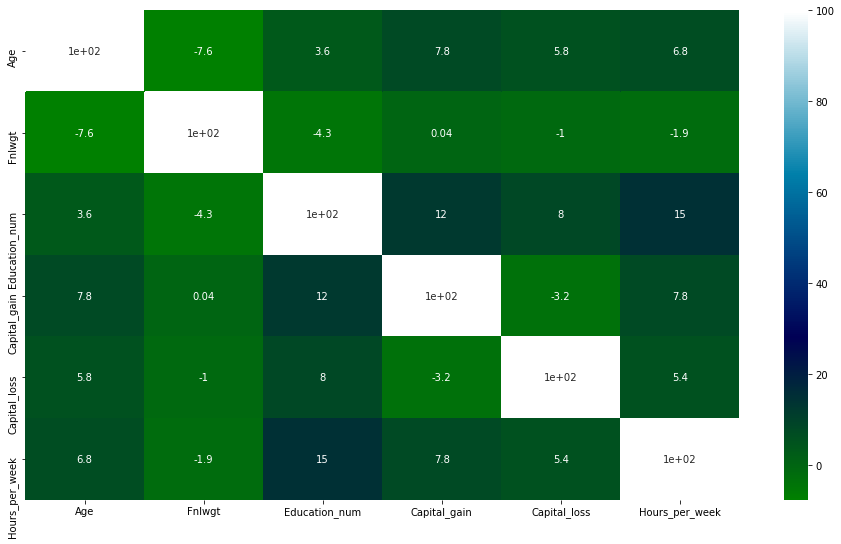

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(round(df.corr()*100,2),annot=True,cmap='ocean')
plt.show()

- None of the columns are highly correlated to each other

# Pairplot 

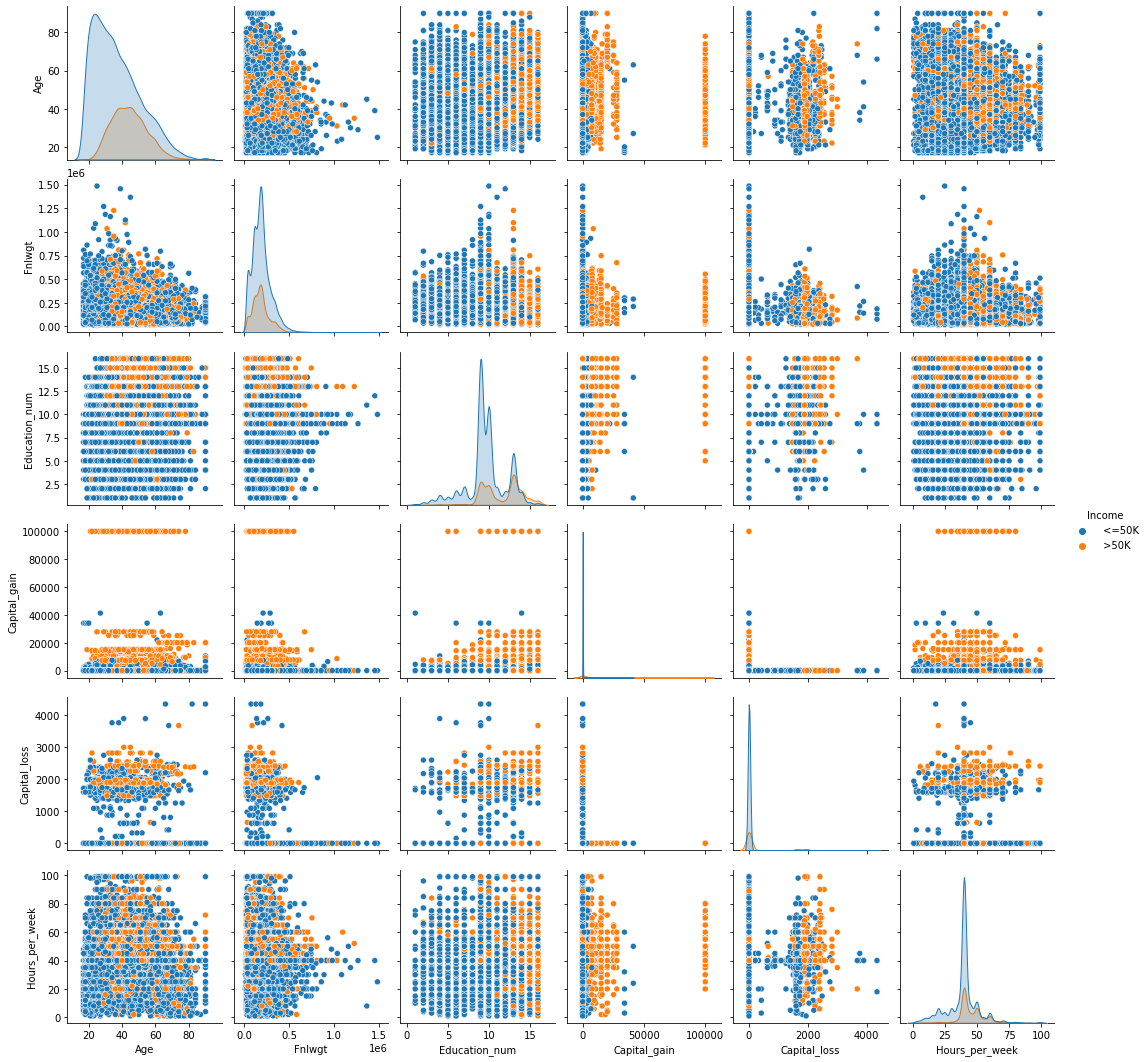

In [13]:
sns.pairplot(df,hue='Income')

- pairplot shows that points are overlapped to each other hence linear model might not perform well in this case
lets see in future

In [14]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Exploratort Data Analysis

In [15]:
df.Income.value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

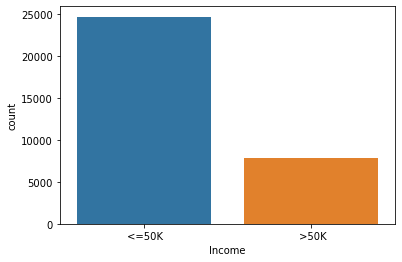

In [16]:
sns.countplot(df['Income'])
plt.show()

- Here we can observer that less number of people approx 24% earn more then 50 K over a year and maximum number of people approx 76%  earn less then 50 k.
- Looks like data is not balanced since class are dived into 76 % is to 24 %. hence we have to make it balance.

converting the "?" class with "other" class.

In [17]:
df['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [18]:
df['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [19]:
df['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        62
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [20]:
df["Workclass"]=df["Workclass"].replace(" ?" , "Others")
df["Occupation"]=df["Occupation"].replace(" ?" ," Other-service")
df["Native_country"]=df["Native_country"].replace(" ?" , "Others")

replaced ? with others

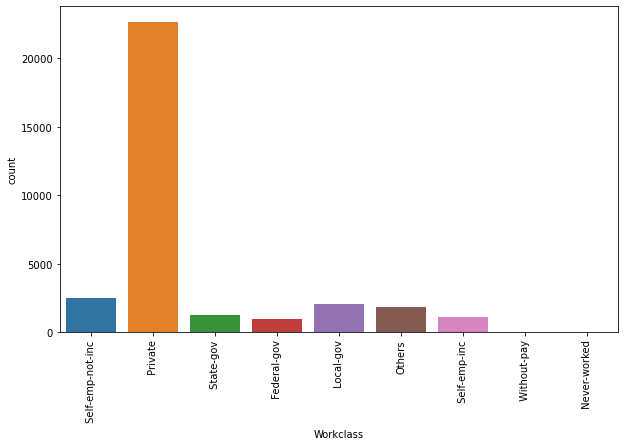

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(df['Workclass'])
plt.xticks(rotation=90)
plt.show()

- Most of the people approx 69.6 %  are from Private workclass
- only 0.02 % people are those who never worked

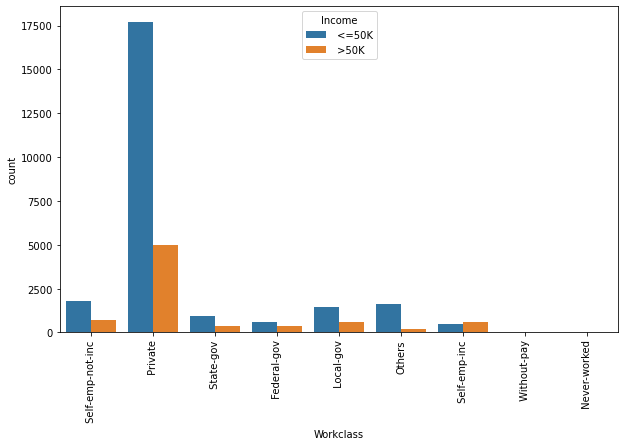

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(df['Workclass'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

### Observations
- There are about approx 54.4 % peopls who worked in a private workplace and earn less then 50K and 15.2% peoples who earns more then 50k.
- In State_government there are about 3.98 % people works from them only 1.08 % people earn more then 50k.
- It is clear from the above observation that if a person wo work in a private has a higher chance to get more than 50k over year as compare to other sectors.

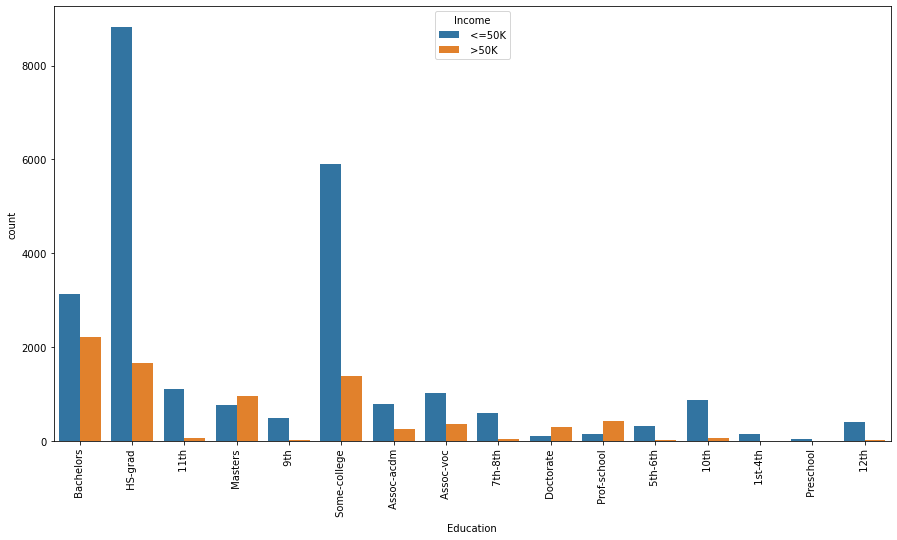

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(df['Education'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

- Most peoples who did Bachlores gets more then 50k.
- Most peoples who did hs grad earns less than 50k.
- 0.1 % how are just did 10th & 12th but gets more then 50k which is great thing to know
- if a person is just a preschool educated he/she will not earn more then 50k.

In [24]:
df.Sex.value_counts()/32536*100

 Male      66.922793
 Female    33.077207
Name: Sex, dtype: float64

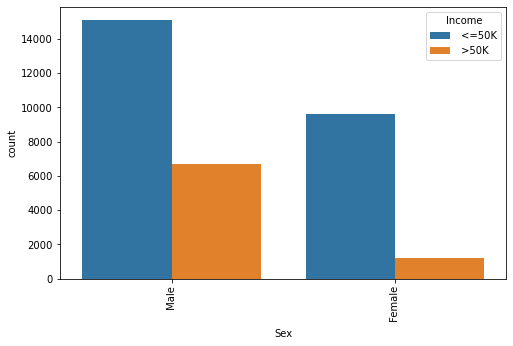

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(df['Sex'],hue=df["Income"])
plt.xticks(rotation=90)
plt.show()

- Most of the persons who are male earns more than 50k

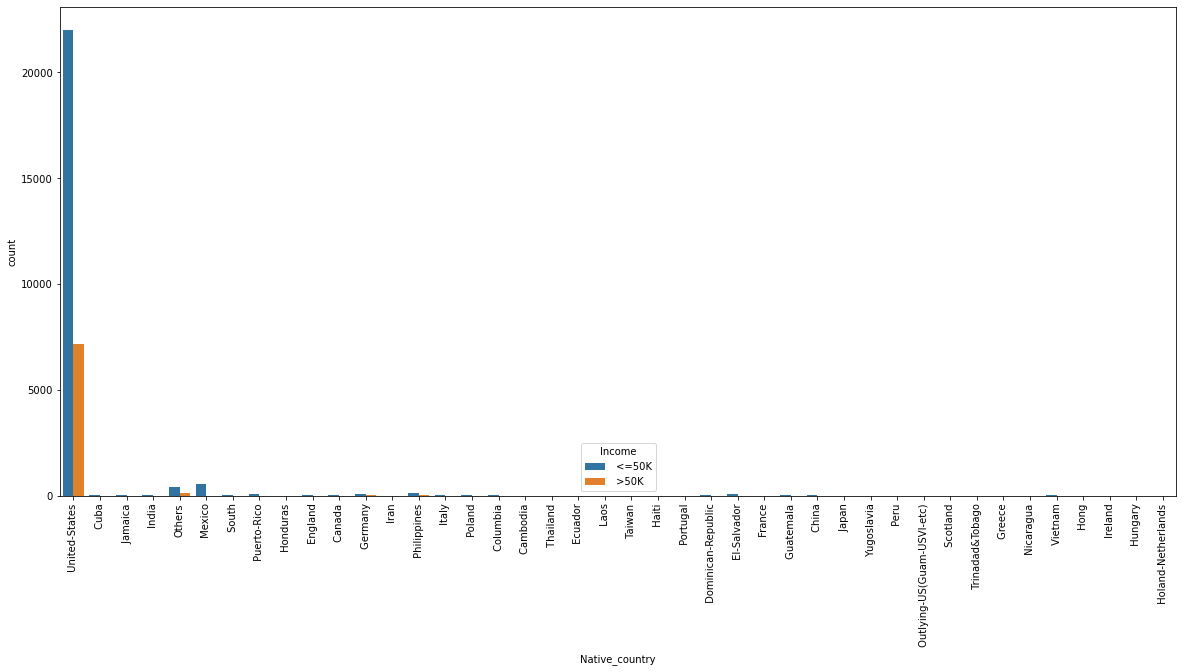

In [26]:
plt.figure(figsize=(20,9))
sns.countplot(df['Native_country'],hue=df["Income"])
plt.xticks(rotation=90)
plt.show()

- 89 % of over all population are from united state who earns more or less then 50K.


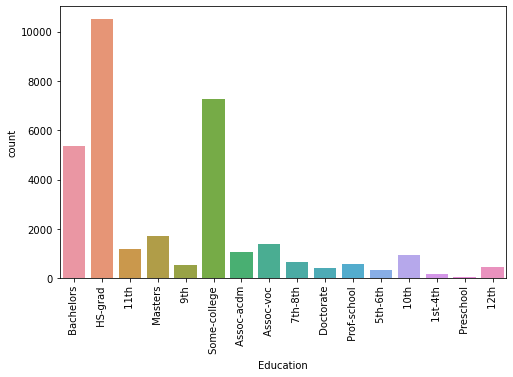

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

- Majority of the peoples are a from Hs_grad background.

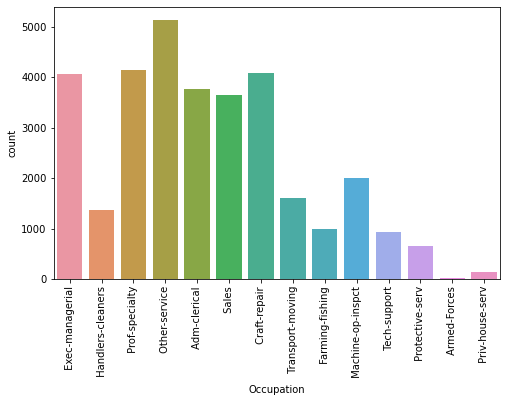

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(df['Occupation'])
plt.xticks(rotation=90)
plt.show()

- 12.7 %  peoples have prof-specialty occupation and only 0.02 % people are from Armed-Forces.

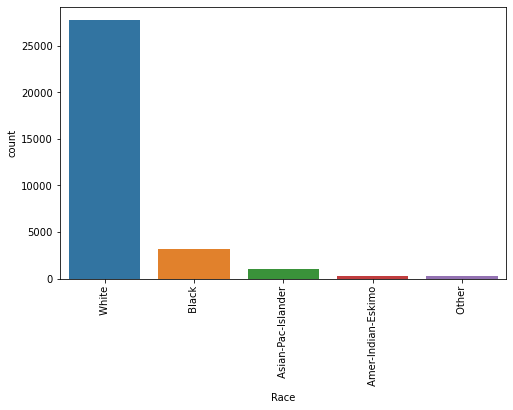

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(df['Race'])
plt.xticks(rotation=90)
plt.show()

Most of the peoples are White race

[]

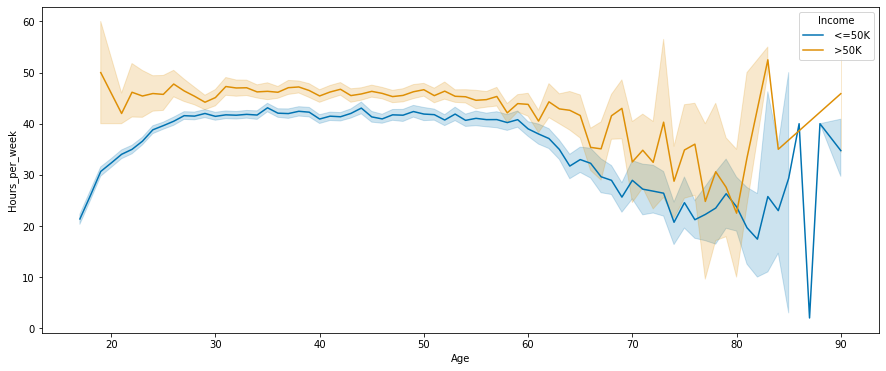

In [30]:
plt.figure(figsize=(15,6))
sns.lineplot(x ="Age", y='Hours_per_week',hue ="Income",palette='colorblind' ,data = df)
plt.plot()

# Checking distribution

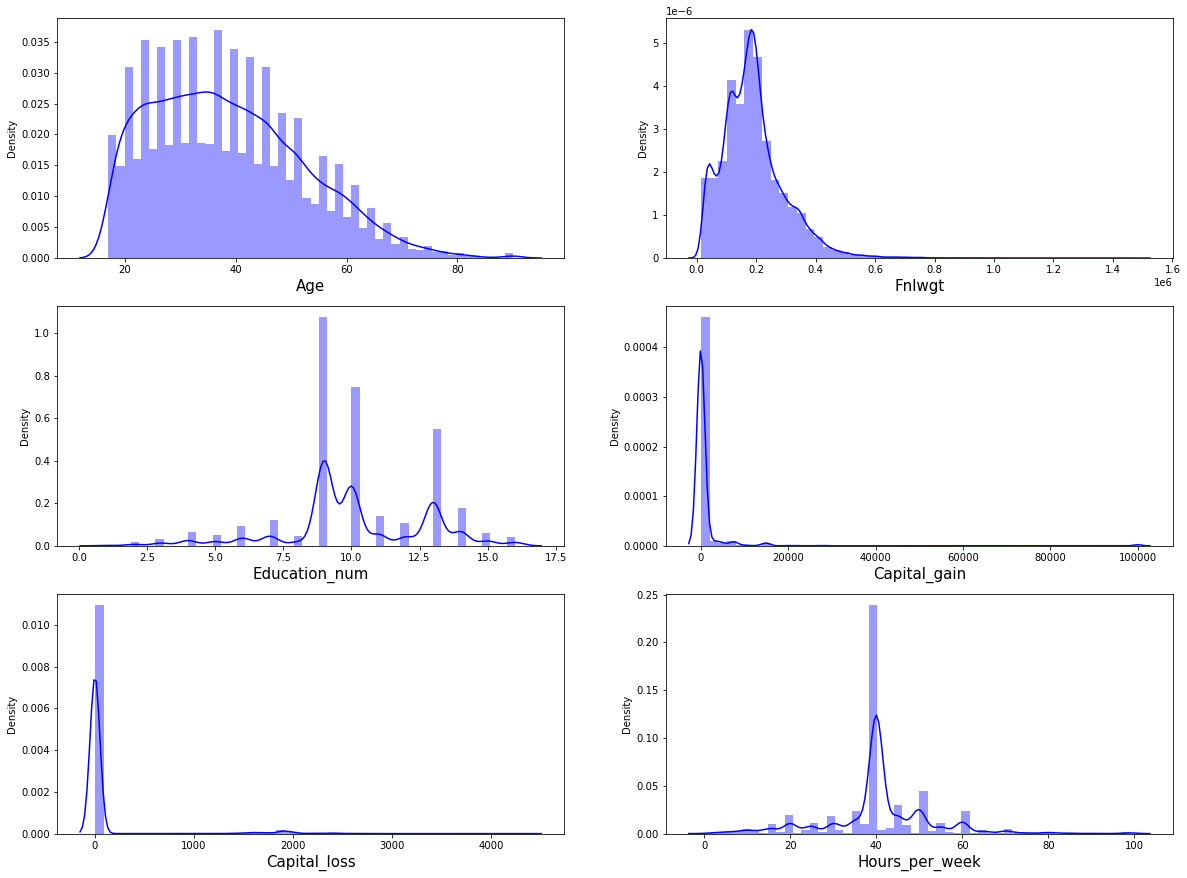

In [31]:
int_columns=[]
for i in df.columns:
    if df[i].dtype =="O":
        pass
    else:
        int_columns.append(i)
plt.figure(figsize=(20,15))
for i ,j in enumerate(int_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(df[j],color="b")
    plt.xlabel(j,fontsize=15)
    plt.ylabel('Density')
plt.show()   

- Age,Capital_loss,Capital_gain and Fnlwgt columns are right skewed.
- Hours_per_week & Education_Num columns are normally distriuted.

# Checking Outliers

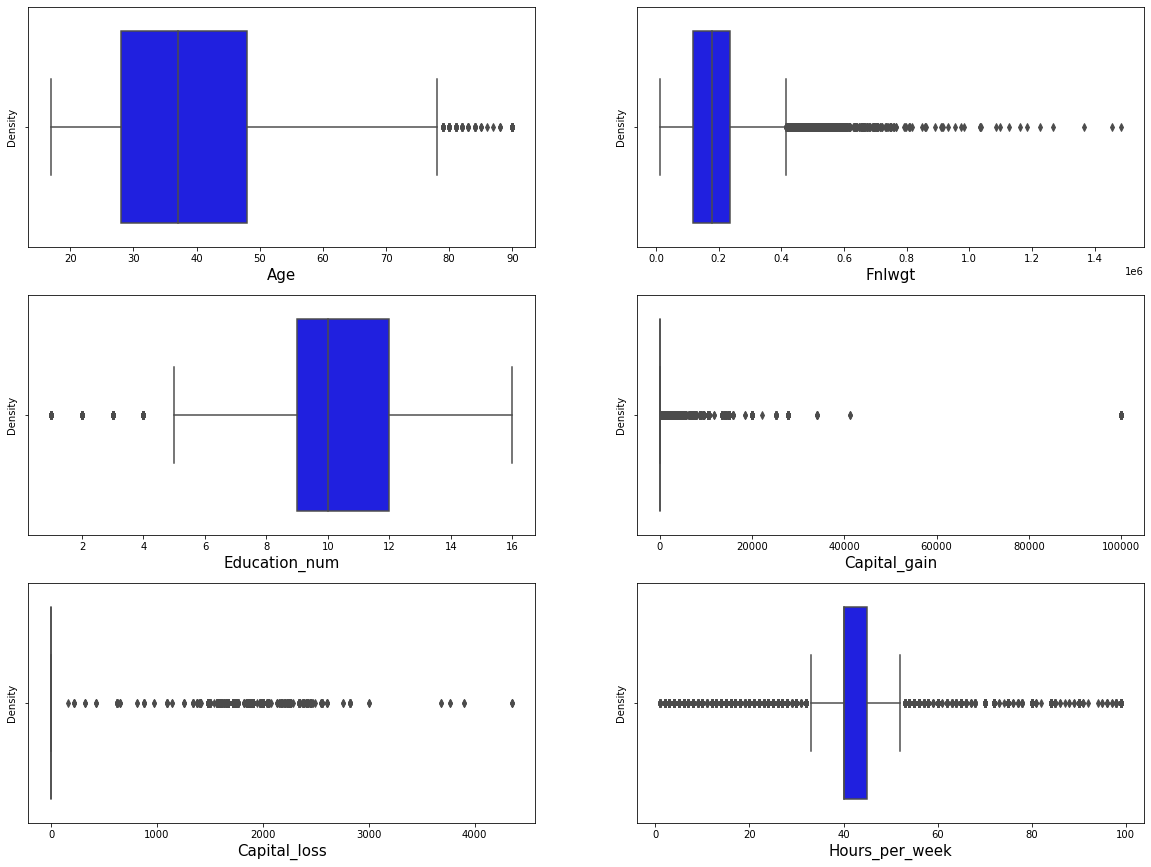

In [32]:
plt.figure(figsize=(20,15))
for i ,j in enumerate(int_columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[j],color="b")
    plt.xlabel(j,fontsize=15)
    plt.ylabel('Density')
plt.show() 

Capital_loss, Capital_gain dropping these columns since these columns contains more then 90%  zero values.


In [33]:
df.drop(columns=['Capital_loss','Capital_gain'],axis=1,inplace=True)

In [34]:
df.shape

(32536, 13)

# Handling Outliers

In [35]:
out_2 =["Age","Education_num",'Fnlwgt']          #handling outliers using IQR method
out_3 = ["Hours_per_week"]                       #handling outliers using Z-score

In [36]:
# Using IQR method
for i in out_2:
    IQR = df[i].quantile(.75) - df[i].quantile(.25)
    upper = df[i].quantile(.75) + 1.5 * IQR
    lower = df[i].quantile(.25) - 1.5 * IQR
    df[i] = np.where(df[i]>upper , upper , np.where(df[i]<lower,lower,df[i]))
    

In [37]:
# Using Z-score
upper = df['Hours_per_week'].mean() + 3 * df['Hours_per_week'].std()
lower = df['Hours_per_week'].mean() - 3 * df['Hours_per_week'].std()
df["Hours_per_week"]=np.where(df["Hours_per_week"]>upper,upper,np.where(df["Hours_per_week"]<lower,lower,df['Hours_per_week']))

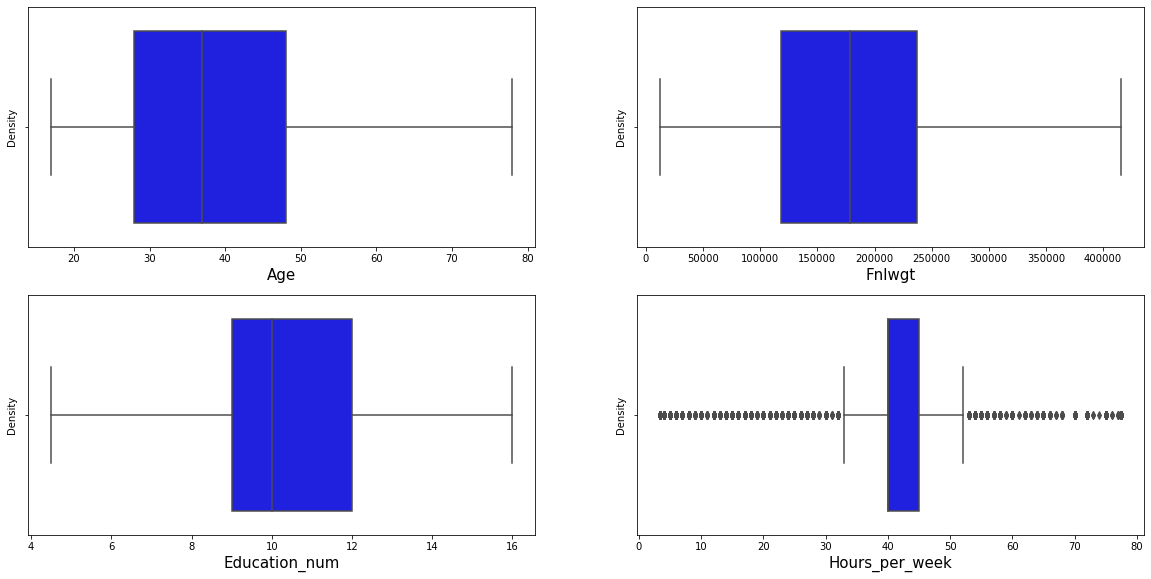

In [38]:
int_columns=[]
for i in df.columns:
    if df[i].dtype =="O":
        pass
    else:
        int_columns.append(i)
plt.figure(figsize=(20,15))
for i ,j in enumerate(int_columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[j],color="b")
    plt.xlabel(j,fontsize=15)
    plt.ylabel('Density')
plt.show() 

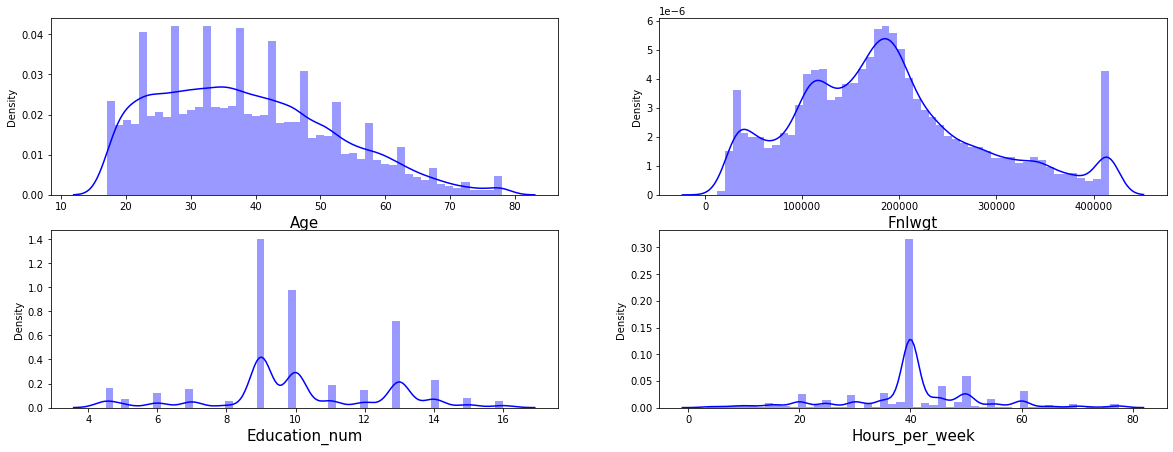

In [39]:
int_columns=[]
for i in df.columns:
    if df[i].dtype =="O":
        pass
    else:
        int_columns.append(i)
plt.figure(figsize=(20,15))
for i ,j in enumerate(int_columns):
    plt.subplot(4,2,i+1)
    sns.distplot(df[j],color="b")
    plt.xlabel(j,fontsize=15)
    plt.ylabel('Density')
plt.show() 

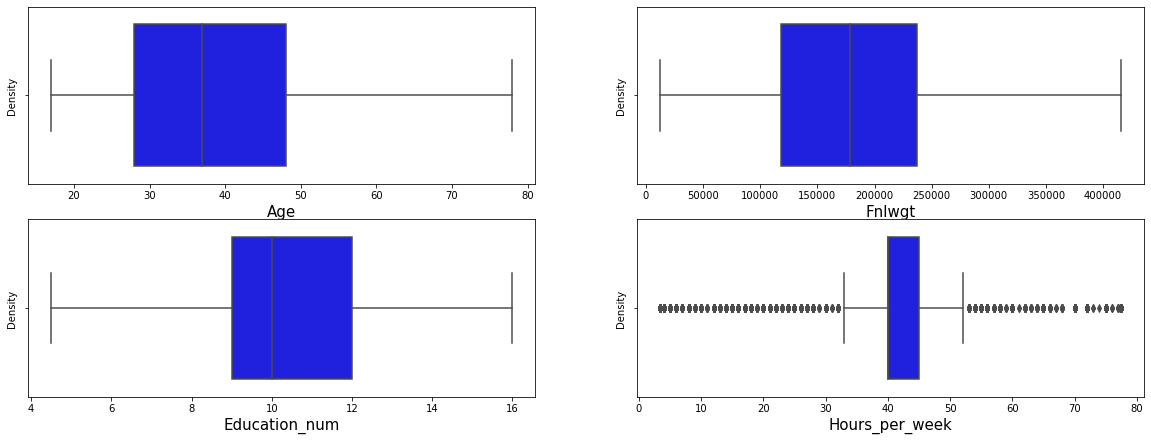

In [40]:
int_columns=[]
for i in df.columns:
    if df[i].dtype =="O":
        pass
    else:
        int_columns.append(i)
plt.figure(figsize=(20,15))
for i ,j in enumerate(int_columns):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[j],color="b")
    plt.xlabel(j,fontsize=15)
    plt.ylabel('Density')
plt.show() 

Here we handled outliers

# Checking for skewness

In [41]:
df.skew()

Age               0.513431
Fnlwgt            0.548103
Education_num    -0.033473
Hours_per_week   -0.104826
dtype: float64

In [42]:
from scipy import stats
df["Age"],params = stats.boxcox(df["Age"])
df["Fnlwgt"],params = stats.boxcox(df["Fnlwgt"])

In [43]:
df.skew()

Age              -0.018721
Fnlwgt           -0.047458
Education_num    -0.033473
Hours_per_week   -0.104826
dtype: float64

Successfully removed skewness

# Handling categorical column Native_country column

In [44]:
index=df["Native_country"].value_counts().sort_values(ascending=True).index
key=[]
val=[]
for i,j in enumerate(index):
    
    key.append(i+1)
    val.append(j)
zipped_values = zip(val, key)
zipped_list = dict(zipped_values)
df['Native_country']=df["Native_country"].map(zipped_list)

Perform ordinal encoding 

In [45]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,5.863170,Self-emp-not-inc,991.318286,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,42,<=50K
1,5.291047,Private,1685.779731,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,42,<=50K
2,5.988627,Private,1767.435610,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,42,<=50K
3,4.689314,Private,2167.725118,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,33,<=50K
4,5.237062,Private,1968.001519,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,40.0,42,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,4.620008,Private,1860.392106,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,38.0,42,<=50K
32556,5.395670,Private,1398.869222,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40.0,42,>50K
32557,6.185552,Private,1386.361483,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,40.0,42,<=50K
32558,4.238755,Private,1623.094608,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,20.0,42,<=50K


In [46]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling  import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn import metrics
from sklearn.decomposition import PCA

# Splitting Data into Input & Output label

In [47]:
X=df.drop(columns=["Education","Income"],axis=1)

In [48]:
y = df["Income"]

# Performing Label Encoding for Output column

In [49]:
le = LabelEncoder()

In [50]:
y = le.fit_transform(y)

In [51]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [52]:
X

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,5.863170,Self-emp-not-inc,991.318286,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,42
1,5.291047,Private,1685.779731,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,42
2,5.988627,Private,1767.435610,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,42
3,4.689314,Private,2167.725118,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,33
4,5.237062,Private,1968.001519,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,40.0,42
...,...,...,...,...,...,...,...,...,...,...,...
32555,4.620008,Private,1860.392106,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,38.0,42
32556,5.395670,Private,1398.869222,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40.0,42
32557,6.185552,Private,1386.361483,9.0,Widowed,Adm-clerical,Unmarried,White,Female,40.0,42
32558,4.238755,Private,1623.094608,9.0,Never-married,Adm-clerical,Own-child,White,Male,20.0,42


In [53]:
step1 = ColumnTransformer(transformers=[
                    ("ohe",OneHotEncoder(sparse=False,drop='first'),[1,4,5,6,7,8])
],remainder="passthrough")


X=step1.fit_transform(X)

In [54]:
X=pd.DataFrame(X)

In [55]:
y=pd.DataFrame(y)

In [56]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.863170,991.318286,13.0,13.0,42.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.291047,1685.779731,9.0,40.0,42.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.988627,1767.435610,7.0,40.0,42.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.689314,2167.725118,13.0,40.0,33.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.237062,1968.001519,14.0,40.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.620008,1860.392106,12.0,38.0,42.0
32532,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.395670,1398.869222,9.0,40.0,42.0
32533,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6.185552,1386.361483,9.0,40.0,42.0
32534,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.238755,1623.094608,9.0,20.0,42.0


In [57]:
y.head(3)

,0
0,0
1,0
2,0


In [58]:
y.value_counts()

0    24697
1     7839
dtype: int64

# Performing SMOTE  technique to make our classes balanced

In [59]:
step2= SMOTE(sampling_strategy='minority',n_jobs=-1)

In [60]:
X,y=step2.fit_resample(X,y)

In [61]:
y.value_counts()

1    24697
0    24697
dtype: int64

# Creating Pipeline

# LogisticRegression

In [62]:
step4 = ColumnTransformer(transformers=[
                    ("Scaling",RobustScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")

step5 = LogisticRegression()

pipe = Pipeline([
     ('step4',step4),
    ('step5',step5)
    
])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print()
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='accuracy',cv=5).mean(),2)*100)
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred)))


Training accuracy 83.0
Testing accuracy 83.0

cross validation score 82.0
Standard Deviation 1.0
Confusion Matrix
[[4859 1316]
 [ 821 5353]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      6175
           1       0.80      0.87      0.83      6174

    accuracy                           0.83     12349
   macro avg       0.83      0.83      0.83     12349
weighted avg       0.83      0.83      0.83     12349

Roc_auc Score 1


# KNN

In [63]:
step4 = ColumnTransformer(transformers=[
                    ("Scaling",RobustScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")

step5 = KNeighborsClassifier()

pipe = Pipeline([
    
    ('step4',step4),
    ('step5',step5)
])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print()
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='accuracy',cv=5).mean(),2)*100)
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred))*100)


Training accuracy 90.0
Testing accuracy 85.0

cross validation score 85.0
Standard Deviation 3.0
Confusion Matrix
[[5020 1155]
 [ 691 5483]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      6175
           1       0.83      0.89      0.86      6174

    accuracy                           0.85     12349
   macro avg       0.85      0.85      0.85     12349
weighted avg       0.85      0.85      0.85     12349

Roc_auc Score 100


# Decission Tree

In [64]:

step4 = ColumnTransformer(transformers=[
                    ("Scaling",RobustScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")

step5 = DecisionTreeClassifier()

pipe = Pipeline([

    ('step4',step4),
    ('step5',step5)
])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print()
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='accuracy',cv=5).mean(),2)*100)
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred)))


Training accuracy 100.0
Testing accuracy 85.0

cross validation score 84.0
Standard Deviation 9.0
Confusion Matrix
[[5174 1001]
 [ 907 5267]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      6175
           1       0.84      0.85      0.85      6174

    accuracy                           0.85     12349
   macro avg       0.85      0.85      0.85     12349
weighted avg       0.85      0.85      0.85     12349

Roc_auc Score 1


# Random Forest

In [65]:
step4 = ColumnTransformer(transformers=[
                    ("Scaling",RobustScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")

step5 = RandomForestClassifier()

pipe = Pipeline([
    
    ('step4',step4),
    ('step5',step5)
])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print()
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='accuracy',cv=5).mean(),2)*100)
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred)))


Training accuracy 100.0
Testing accuracy 88.0

cross validation score 87.0
Standard Deviation 10.0
Confusion Matrix
[[5550  625]
 [ 802 5372]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      6175
           1       0.90      0.87      0.88      6174

    accuracy                           0.88     12349
   macro avg       0.88      0.88      0.88     12349
weighted avg       0.88      0.88      0.88     12349

Roc_auc Score 1


# ExtraTreesClassifier

In [66]:
step4 = ColumnTransformer(transformers=[
                    ("Scaling",RobustScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")

step5 = ExtraTreesClassifier()

pipe = Pipeline([
    
    ('step4',step4),
    ('step5',step5)
])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print()
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='accuracy',cv=5).mean(),2)*100)
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred)))


Training accuracy 100.0
Testing accuracy 88.0

cross validation score 87.0
Standard Deviation 9.0
Confusion Matrix
[[5465  710]
 [ 791 5383]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      6175
           1       0.88      0.87      0.88      6174

    accuracy                           0.88     12349
   macro avg       0.88      0.88      0.88     12349
weighted avg       0.88      0.88      0.88     12349

Roc_auc Score 1


# Naive Bayse

In [67]:

step4 = ColumnTransformer(transformers=[
                    ("Scaling",RobustScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")

step5 = GaussianNB()

pipe = Pipeline([
    
    ('step4',step4),
    ('step5',step5)
])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print()
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='accuracy',cv=5).mean(),2)*100)
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred)))


Training accuracy 76.0
Testing accuracy 76.0

cross validation score 74.0
Standard Deviation 1.0
Confusion Matrix
[[3719 2456]
 [ 508 5666]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.60      0.72      6175
           1       0.70      0.92      0.79      6174

    accuracy                           0.76     12349
   macro avg       0.79      0.76      0.75     12349
weighted avg       0.79      0.76      0.75     12349

Roc_auc Score 1


# AdaBoostClassifier

In [68]:
step4 = ColumnTransformer(transformers=[
                    ("Scaling",RobustScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")

step5 = AdaBoostClassifier()

pipe = Pipeline([

    ('step4',step4),
    ('step5',step5)
])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print()
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='accuracy').mean(),2)*100)
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred)))


Training accuracy 88.0
Testing accuracy 88.0

cross validation score 87.0
Standard Deviation 7.000000000000001
Confusion Matrix
[[5356  819]
 [ 642 5532]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      6175
           1       0.87      0.90      0.88      6174

    accuracy                           0.88     12349
   macro avg       0.88      0.88      0.88     12349
weighted avg       0.88      0.88      0.88     12349

Roc_auc Score 1


# GradientBoost

In [69]:
step4 = ColumnTransformer(transformers=[
                    ("Scaling",RobustScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")

step5 = GradientBoostingClassifier()

pipe = Pipeline([
    
    ('step4',step4),
    ('step5',step5)
])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print()
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='accuracy').mean(),2)*100)
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred),2))

Training accuracy 89.0
Testing accuracy 89.0

cross validation score 87.0
Standard Deviation 8.0
Confusion Matrix
[[5493  682]
 [ 677 5497]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      6175
           1       0.89      0.89      0.89      6174

    accuracy                           0.89     12349
   macro avg       0.89      0.89      0.89     12349
weighted avg       0.89      0.89      0.89     12349

Roc_auc Score 0.89


# XGBoost

In [70]:
step4 = ColumnTransformer(transformers=[
                    ("Scaling",RobustScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")

step5 = XGBClassifier()

pipe = Pipeline([
    
    ('step4',step4),
    ('step5',step5)
])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print()
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='accuracy').mean(),2)*100)
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred),2))


[18:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy 92.0
Testing accuracy 90.0

[18:37:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:58] WARNING: C:/U

# VotingClassifier

In [71]:

step4 = ColumnTransformer(transformers=[
                    ("Scaling",RobustScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")

rf = RandomForestClassifier()
etc= ExtraTreesClassifier()
gb = GradientBoostingClassifier()
adb = AdaBoostClassifier()
est = [("gb",gb),("rf",rf),("etc",etc),('adb',adb)]


step5 = VotingClassifier(estimators=est)

pipe = Pipeline([
    
    ('step4',step4),
    ('step5',step5)
])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print()
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='accuracy').mean(),2)*100)
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred),2))


Training accuracy 95.0
Testing accuracy 89.0

cross validation score 87.0
Standard Deviation 10.0
Confusion Matrix
[[5655  520]
 [ 860 5314]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      6175
           1       0.91      0.86      0.89      6174

    accuracy                           0.89     12349
   macro avg       0.89      0.89      0.89     12349
weighted avg       0.89      0.89      0.89     12349

Roc_auc Score 0.89


# Selecting GradientBoosting classifier as a best performing model. 

In [72]:
step4 = ColumnTransformer(transformers=[
                    ("Scaling",RobustScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")

step5 = GradientBoostingClassifier()

pipe = Pipeline([
    
    ('step4',step4),
    ('step5',step5)
])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print()
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='accuracy').mean(),2)*100)
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred),2))


Training accuracy 89.0
Testing accuracy 89.0

cross validation score 87.0
Standard Deviation 8.0
Confusion Matrix
[[5493  682]
 [ 677 5497]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      6175
           1       0.89      0.89      0.89      6174

    accuracy                           0.89     12349
   macro avg       0.89      0.89      0.89     12349
weighted avg       0.89      0.89      0.89     12349

Roc_auc Score 0.89


# Hyper Parameter Tuning

In [73]:
params = {
    
    "step5__loss":['deviance', 'exponential'],
    "step5__learning_rate":np.arange(0,.6,0.05),
    "step5__n_estimators":np.arange(100,600,50),,
    "step5__max_features":[.5,.55,.6,.65,.70,.75]
    
}

In [74]:
randomscv = RandomizedSearchCV(pipe,params,scoring="accuracy",n_jobs=-1)

In [75]:
randomscv.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('step4',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Scaling',
                                                                               RobustScaler(),
                                                                               slice(0, 43, None))])),
                                             ('step5',
                                              GradientBoostingClassifier())]),
                   n_jobs=-1,
                   param_distributions={'step5__learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55]),
                                        'step5__max_features': [0.5, 0.55, 0.6,
                                                                0.65, 0.7,
                                                                0.75],
                          

In [77]:
randomscv.best_params_


{'step5__n_estimators': 450,
 'step5__max_features': 0.75,
 'step5__learning_rate': 0.1}

- These are the best parameters for the gradient boost classifier

In [78]:
step4 = ColumnTransformer(transformers=[
                    ("Scaling",RobustScaler(),slice(0,X.shape[1]+1))
],remainder="passthrough")

step5 = GradientBoostingClassifier(n_estimators=450,max_features=0.75,learning_rate=0.1)

pipe = Pipeline([
    
    ('step4',step4),
    ('step5',step5)
])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42,stratify=y)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print()
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='accuracy').mean(),2)*100)
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred),2))


Training accuracy 90.0
Testing accuracy 90.0

cross validation score 87.0
Standard Deviation 9.0
Confusion Matrix
[[5583  592]
 [ 698 5476]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      6175
           1       0.90      0.89      0.89      6174

    accuracy                           0.90     12349
   macro avg       0.90      0.90      0.90     12349
weighted avg       0.90      0.90      0.90     12349

Roc_auc Score 0.9


- We can clearly notice that here accuracy is increased by 1% after hyperparameter tuning and false positive are also reduced.

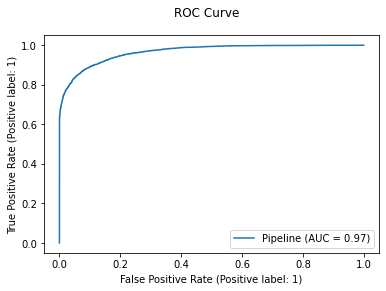

In [79]:
from sklearn import metrics
plot = metrics.plot_roc_curve(pipe, X_test, y_test)
plot.figure_.suptitle("ROC Curve")
plt.show()

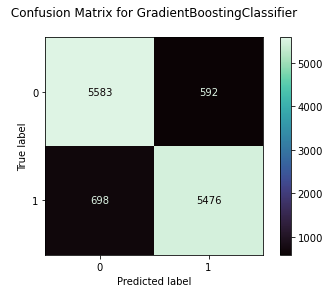

In [81]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='mako')
plt.title(' Confusion Matrix for GradientBoostingClassifier \n')
plt.show()

# Saving the model

In [86]:
import pickle
pickle.dump(pipe,open("Census_Income_Project.pkl","wb"))

# Prediction

In [96]:
pd.Series(predicted_values)

0        0
1        1
2        1
3        0
4        1
        ..
12344    1
12345    1
12346    1
12347    1
12348    1
Length: 12349, dtype: int32